In [1]:
import pandas as pd
import os
import re


#Nous ouvrons le dataset
df_ACE = pd.read_csv(os.path.join(r"comptages-routiers-permanents_ACE.csv"), sep=";")
df_Sts = pd.read_csv(os.path.join(r"comptages-routiers-permanents_Sts.csv"), sep=";")
df_convention = pd.read_csv(os.path.join(r"comptages-routiers-permanents_convention.csv"), sep=";")


#print(df_ACE.head())

(df_ACE, df_Sts, df_convention)
tagg = ["Champs Elysées", "Sts-Pères", "Convention"]

def clean_date(date):
    
    date = re.sub('T', ' ', date)
    date=date[:-6]
    return date

#compte_1=df_ACE.groupby("Etat arc")["Date et heure de comptage"].nunique()
for df in (df_ACE, df_Sts, df_convention):
    df['Date et heure de comptage'] = df['Date et heure de comptage'].apply(lambda s : clean_date(s))

#df_convention['Date et heure de comptage'] = df_convention['Date et heure de comptage'].apply(lambda s : clean_date(s))
#df_Sts['Date et heure de comptage'] = df_Sts['Date et heure de comptage'].apply(lambda s : clean_date(s))

#Nous adaptons notre features "Date" au format d'une série temporelle

for df in (df_ACE, df_Sts, df_convention):
    df['Date et heure de comptage']= pd.to_datetime(df["Date et heure de comptage"], format='%Y-%m-%d %H:%M:%S')
 
    
for df in (df_ACE, df_Sts, df_convention):
    df.sort_values("Date et heure de comptage",inplace = True)
    print(df.head())

df_rues = pd.concat([df_ACE, df_Sts, df_convention])
#Nous indiquons que la série temporelle est indexée selon la date


#df_rues = df_ACE.set_index('Date et heure de comptage')

    
print(df_rues.index)

#Nous créons plusieurs colonnes permettant de situer la donnée par jour/mois/année. Cela nous servira pa la suite pour traiter
#la données selon différentes échelles temporelles.


#df_rues['Year'] = df_rues.index.year
#df_rues['Month'] = df_rues.index.month
#df_rues['Weekday Name'] = df_rues.index.weekday
#df_rues['Hour'] = df_rues.index.hour



print(df_rues.head())

      Identifiant arc            Libelle Date et heure de comptage  \
6712             4264  AV_Champs_Elysees       2019-11-01 04:00:00   
6713             4264  AV_Champs_Elysees       2019-11-01 05:00:00   
6714             4264  AV_Champs_Elysees       2019-11-01 06:00:00   
2607             4264  AV_Champs_Elysees       2019-11-01 07:00:00   
2608             4264  AV_Champs_Elysees       2019-11-01 08:00:00   

      Débit horaire  Taux d'occupation Etat trafic  Identifiant noeud amont  \
6712          746.0           10.98889      Fluide                     2294   
6713          549.0            7.40722      Fluide                     2294   
6714          503.0            7.66667      Fluide                     2294   
2607          500.0            4.75500      Fluide                     2294   
2608          525.0            5.37389      Fluide                     2294   

               Libelle noeud amont  Identifiant noeud aval  \
6712  Av_Champs_Elysees-Washington        

In [2]:

df_rues.drop(columns=["Libelle noeud aval", "Libelle noeud amont", "Libelle", "Identifiant noeud aval", "Identifiant noeud amont", "geo_point_2d", "geo_shape", "Date debut dispo data", "Date debut dispo data"], inplace = True)
print(df_rues.head())
compte_1=df_rues.groupby("Identifiant arc").nunique()
print(compte_1)

      Identifiant arc Date et heure de comptage  Débit horaire  \
6712             4264       2019-11-01 04:00:00          746.0   
6713             4264       2019-11-01 05:00:00          549.0   
6714             4264       2019-11-01 06:00:00          503.0   
2607             4264       2019-11-01 07:00:00          500.0   
2608             4264       2019-11-01 08:00:00          525.0   

      Taux d'occupation Etat trafic  Etat arc Date fin dispo data  
6712           10.98889      Fluide  Invalide          2019-06-01  
6713            7.40722      Fluide  Invalide          2019-06-01  
6714            7.66667      Fluide  Invalide          2019-06-01  
2607            4.75500      Fluide  Invalide          2019-06-01  
2608            5.37389      Fluide  Invalide          2019-06-01  
                 Date et heure de comptage  Débit horaire  Taux d'occupation  \
Identifiant arc                                                                
191                                

In [3]:
def chunks(l, size, step):
    """ Yield successive n-sized chunks from l.
    """
    l = l[:(len(l) // size) * size]
    return [x for x in [l[i : i + size] for i in range(0, len(l), step)] if len(x) == size]

In [4]:
df = df_rues

df = df.replace({4264:"1", 5671: "2", 191:"3"})
df["Identifiant arc"]=df["Identifiant arc"].astype(str)
print(df.head())
print(df.dtypes)

     Identifiant arc Date et heure de comptage Débit horaire  \
6712               1       2019-11-01 04:00:00           746   
6713               1       2019-11-01 05:00:00           549   
6714               1       2019-11-01 06:00:00           503   
2607               1       2019-11-01 07:00:00           500   
2608               1       2019-11-01 08:00:00           525   

     Taux d'occupation Etat trafic  Etat arc Date fin dispo data  
6712           10.9889      Fluide  Invalide          2019-06-01  
6713           7.40722      Fluide  Invalide          2019-06-01  
6714           7.66667      Fluide  Invalide          2019-06-01  
2607             4.755      Fluide  Invalide          2019-06-01  
2608           5.37389      Fluide  Invalide          2019-06-01  
Identifiant arc                      object
Date et heure de comptage    datetime64[ns]
Débit horaire                        object
Taux d'occupation                    object
Etat trafic                          

In [5]:
#paramètres
N_input = 14*24
N_output = 7*24
device = 'cuda'
p_test = 0.2
optimizer_parameters = {'lr': 0.001}
batch_size = 32

In [6]:
#Nous précisons ici que la série temporelle possède une fréquence à l'heure et nous remplaçons les valeurs manquantes par
#la valeur qui les précèdent.

missing_df_1= df[df.isnull().any(1)]
print(missing_df_1)
df = df.dropna()

     Identifiant arc Date et heure de comptage Débit horaire  \
2657               1       2019-11-05 09:00:00           NaN   
7528               1       2019-11-18 12:00:00           NaN   
5935               1       2019-11-24 18:00:00           106   
2315               1       2019-11-24 19:00:00           281   
2333               1       2019-11-25 16:00:00           NaN   
...              ...                       ...           ...   
2215               2       2020-10-15 10:00:00           NaN   
7493               2       2020-10-29 12:00:00           NaN   
7492               2       2020-10-29 13:00:00           NaN   
1137               2       2020-11-13 14:00:00           NaN   
4683               2       2020-11-17 15:00:00           NaN   

     Taux d'occupation Etat trafic  Etat arc Date fin dispo data  
2657               NaN     Inconnu  Invalide          2019-06-01  
7528               NaN     Inconnu  Invalide          2019-06-01  
5935               NaN     Inc

In [7]:
import numpy as np

df["Débit horaire"]= df["Débit horaire"].astype(int)
data = df.sort_values(['Date et heure de comptage', 'Identifiant arc']).groupby('Identifiant arc')["Débit horaire"].apply(lambda x: chunks(x.values, size=N_input+N_output, step=N_output))
#print(data.head())

#print(data.values)
data_numpy = np.array([np.array(x) for x in data.values])

print(data_numpy.dtype)
dep = np.array([x for x in data.index])
#print(dep)

int32


In [8]:
# Mélange les rues
ind = np.arange(len(data_numpy))
np.random.shuffle(ind)
data_numpy = data_numpy[ind]

In [9]:
# Sépare en train/test
nb_train = int(len(data_numpy)*(1-p_test))

data_numpy_test = data_numpy[nb_train:]
data_numpy_train = data_numpy[:nb_train]

In [10]:
# Concatène chaque rues ensembles
data_numpy_train = np.concatenate(data_numpy_train)
data_numpy_test = np.concatenate(data_numpy_test)

In [11]:
# Normalise par mean-std calculées sur le data de train
print(data_numpy_train)
std = data_numpy_train.std((0,1))[None]
mean = data_numpy_train.mean((0,1))[None]
data_numpy_train = (data_numpy_train-mean[None])/std[None]
data_numpy_test = (data_numpy_test-mean[None])/std[None]
print(data_numpy_train)
def rescale(data):
    return data * std + mean

[[ 746  549  503 ...  451  369  267]
 [ 279  407  746 ...  773 1128 1086]
 [ 308  445  769 ...  866 1130 1254]
 ...
 [ 974  972  961 ...  639  782  790]
 [ 997  907 1086 ...  746  726  808]
 [ 938  924  906 ...  862  855  589]]
[[ 0.31107039 -0.20004824 -0.31939574 ... -0.4543103  -0.66706018
  -0.93170029]
 [-0.90056616 -0.56846877  0.31107039 ...  0.38112218  1.30217352
   1.19320407]
 [-0.82532534 -0.46987736  0.37074414 ...  0.62241169  1.30736254
   1.62908189]
 ...
 [ 0.90261886  0.89742984  0.86889022 ...  0.03345774  0.40447278
   0.42522887]
 [ 0.96229261  0.72878663  1.19320407 ...  0.31107039  0.25918018
   0.47193006]
 [ 0.80921647  0.77289332  0.72619212 ...  0.61203365  0.59387207
  -0.09626781]]


In [12]:
# Sépare en input/output
X_train, y_train = data_numpy_train[:, :N_input], data_numpy_train[:, N_input:]
X_test, y_test = data_numpy_test[:, :N_input], data_numpy_test[:, N_input:]
print(X_train)

[[ 0.31107039 -0.20004824 -0.31939574 ... -0.02881052 -0.27788356
  -0.75786806]
 [-0.90056616 -0.56846877  0.31107039 ... -0.4543103  -0.66706018
  -0.93170029]
 [-0.82532534 -0.46987736  0.37074414 ...  0.38112218  1.30217352
   1.19320407]
 ...
 [ 0.90261886  0.89742984  0.86889022 ...  0.30847588  0.57311598
   0.7443537 ]
 [ 0.96229261  0.72878663  1.19320407 ...  0.03345774  0.40447278
   0.42522887]
 [ 0.80921647  0.77289332  0.72619212 ...  0.31107039  0.25918018
   0.47193006]]


In [13]:
# Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install torch===1.6.0 torchvision===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html
import torch

#import torch
print(type(X_train))
print(data_numpy.dtype)
print(torch.from_numpy(X_train))
dataset_train = torch.utils.data.TensorDataset(torch.FloatTensor(X_train[:,:,None]),
                                               torch.FloatTensor(y_train[:,:,None]))
dataset_test = torch.utils.data.TensorDataset(torch.FloatTensor(X_test[:,:,None]),
                                              torch.FloatTensor(y_test[:,:,None]))

trainloader = torch.utils.data.DataLoader(
    dataset_train, batch_size=batch_size, shuffle=True, num_workers=1)
testloader = torch.utils.data.DataLoader(
    dataset_test, batch_size=batch_size, shuffle=False, num_workers=1)

<class 'numpy.ndarray'>
int32
tensor([[ 0.3111, -0.2000, -0.3194,  ..., -0.0288, -0.2779, -0.7579],
        [-0.9006, -0.5685,  0.3111,  ..., -0.4543, -0.6671, -0.9317],
        [-0.8253, -0.4699,  0.3707,  ...,  0.3811,  1.3022,  1.1932],
        ...,
        [ 0.9026,  0.8974,  0.8689,  ...,  0.3085,  0.5731,  0.7444],
        [ 0.9623,  0.7288,  1.1932,  ...,  0.0335,  0.4045,  0.4252],
        [ 0.8092,  0.7729,  0.7262,  ...,  0.3111,  0.2592,  0.4719]],
       dtype=torch.float64)


In [14]:
from tslearn.metrics import dtw, dtw_path
from tslearn.barycenters import dtw_barycenter_averaging
def fake_baye(outputs, log_sigmas, target):
    loss = 1/2 * (log_sigmas + torch.exp(-log_sigmas) * (outputs - target)**2)
    return loss.mean()

def loss_rescale_factor(log_rescale_factor, outputs, log_sigmas, target):
    batch_size = outputs.shape[0]
    loss = 1/2 * torch.exp(-2 * log_rescale_factor) * torch.sum(torch.exp(-log_sigmas) * (outputs - target)**2)
    loss += batch_size * log_rescale_factor
    return loss.sum()

d:\anaconda\envs\ml_mvp_1\lib\site-packages\tslearn\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [15]:
import tqdm

def train_model(net, loss_type, optimizer_parameters, epochs=1000, gamma=0.001,
                eval_every=50, Lambda=1, alpha=0.5, beta=0.):
    optimizer = torch.optim.Adam(net.parameters(), **optimizer_parameters)
    criterion = torch.nn.MSELoss()

    if hasattr(net, 'log_rescale_factor'):
        optimizer_rescale_factor = torch.optim.Adam([net.log_rescale_factor], **optimizer_parameters)

    t = tqdm.notebook.tqdm(range(epochs))
    for epoch in t:
        for i, data in enumerate(trainloader, 0):

            net.train()
            if hasattr(net, 'log_rescale_factor'):
                net.log_rescale_factor.require_grad = False

            inputs, target = data
            inputs = inputs.to(device)
            target = target.to(device)
            batch_size, N_output = target.shape[0:2]

            # forward + backward + optimize
            outputs = net(inputs)
            if len(outputs) == 2:
                outputs, _ = outputs
            else:
                outputs, log_sigmas, _ = outputs

            loss_mse, loss_shape, loss_temporal = torch.tensor(
                0), torch.tensor(0), torch.tensor(0)

            loss = 0
            if 'mse' in loss_type:
                loss_mse = 100 * criterion(outputs, target)
                loss += loss_mse

            if 'dilate' in loss_type:
                loss_dilate, loss_shape, loss_temporal = dilate_loss(
                    outputs, target, alpha, gamma, device)
                loss += loss_dilate

            if 'fake_baye' in loss_type:
                loss_fake_baye = fake_baye(outputs, log_sigmas, target)
                loss += loss_fake_baye

            if 'all_target_regression' in loss_type:
                loss_target_week_regression = F.mse_loss(outputs.sum(1), target.sum(1))
                loss += loss_target_week_regression

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if hasattr(net, 'log_rescale_factor'):
                net.log_rescale_factor.require_grad = True

                loss_rescale = loss_rescale_factor(net.log_rescale_factor, outputs.detach(), log_sigmas.detach(),
                                                   target)
                optimizer_rescale_factor.zero_grad()
                loss_rescale.backward()
                optimizer_rescale_factor.step()

        if (epoch % eval_every == 0):
            eval_mse, eval_dtw, eval_tdi = eval_model(net, testloader, gamma)

        t.set_postfix(loss=loss.item(),
                      loss_shape=loss_shape.item(),
                      loss_temporal=loss_temporal.item(),
                      mse=eval_mse,
                      dtw=eval_dtw,
                      tdi=eval_tdi)

In [16]:
def eval_model(net, loader, gamma):
    criterion = torch.nn.MSELoss()
    losses_mse = []
    losses_dtw = []
    losses_tdi = []

    net.eval()

    for i, data in enumerate(loader, 0):
        loss_mse, loss_dtw, loss_tdi = torch.tensor(
            0), torch.tensor(0), torch.tensor(0)
        # get the inputs
        inputs, target = data
        inputs = inputs.to(device)
        target = target.to(device)
        batch_size, N_output = target.shape[0:2]
        outputs = net(inputs)
        if len(outputs) == 2:
            outputs, _ = outputs
        else:
            outputs, prewarp_outputs, warp_matrix = outputs

        # MSE
        loss_mse = criterion(target, outputs)
        loss_dtw, loss_tdi = 0, 0
        # DTW and TDI
        for k in range(batch_size):
            target_k_cpu = target[k, :, 0:1].view(-1).detach().cpu().numpy()
            output_k_cpu = outputs[k, :, 0:1].view(-1).detach().cpu().numpy()

            loss_dtw += dtw(target_k_cpu, output_k_cpu)
            path, sim = dtw_path(target_k_cpu, output_k_cpu)

            Dist = 0
            for i, j in path:
                Dist += (i - j) * (i - j)
            loss_tdi += Dist / (N_output * N_output)

        loss_dtw = loss_dtw / batch_size
        loss_tdi = loss_tdi / batch_size

        # print statistics
        losses_mse.append(loss_mse.item())
        losses_dtw.append(loss_dtw)
        losses_tdi.append(loss_tdi)

    return np.array(losses_mse).mean(), np.array(losses_dtw).mean(), np.array(losses_tdi).mean()


In [17]:
import torch.nn as nn
import torch.nn.functional as F

class Encoder(nn.Module):
    def __init__(self, input_dim, enc_hid_dim, dec_hid_dim, num_layers, dropout):
        super().__init__()
        self.enc_hid_dim = enc_hid_dim
        self.num_layers = num_layers
        self.rnn = nn.GRU(input_dim, enc_hid_dim,
                          num_layers=num_layers,
                          bidirectional=True,
                          batch_first=True,
                          dropout=dropout)

        self.fc = nn.Linear(enc_hid_dim * 2, dec_hid_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, src, hidden=None):

        outputs, hidden = self.rnn(src, hidden)

        # outputs = [batch size, src len, hid dim * num directions]
        # hidden = [n layers * num directions, batch size, hid dim]

        hidden = torch.cat((hidden[::2, :, :], hidden[1::2, :, :]), dim=2)
        hidden = self.dropout(hidden)
        hidden = torch.tanh(self.fc(hidden))

        # outputs = [batch size, src len, enc hid dim * 2]
        # hidden = [batch size, dec hid dim]

        return outputs, hidden


class Attention(nn.Module):
    def __init__(self, enc_hid_dim, dec_hid_dim):
        super().__init__()

        self.attn = nn.Linear((enc_hid_dim * 2) + dec_hid_dim, dec_hid_dim)
        self.v = nn.Linear(dec_hid_dim, 1, bias=False)

    def forward(self, hidden, encoder_outputs):

        # hidden = [batch size, dec hid dim]
        # encoder_outputs = [batch size, src len, enc hid dim * 2]

        src_len = encoder_outputs.shape[1]

        # repeat decoder hidden state src_len times
        hidden = hidden.unsqueeze(1).repeat(1, src_len, 1)

        # hidden = [batch size, src len, dec hid dim]
        # encoder_outputs = [batch size, src len, enc hid dim * 2]

        energy = torch.tanh(
            self.attn(torch.cat((hidden, encoder_outputs), dim=2)))

        # energy = [batch size, src len, dec hid dim]

        attention = self.v(energy).squeeze(2)

        # attention= [batch size, src len]

        return F.softmax(attention, dim=1)


class Decoder(nn.Module):
    def __init__(self, output_dim, enc_hid_dim, dec_hid_dim, fc_dim,
                 num_layers, dropout, attention, bayesian=False, embed_dim=None):
        super().__init__()

        self.output_dim = output_dim
        self.attention = attention
        self.num_layers = num_layers
        self.enc_hid_dim = enc_hid_dim
        self.dec_hid_dim = dec_hid_dim
        self.fc_dim = fc_dim
        
        self.embed_dim = embed_dim if embed_dim is not None else 0
        
        self.bayesian = bayesian
        
        if self.bayesian:
            self.out_log_sigma = nn.Linear(fc_dim + output_dim, output_dim)

            self.rnn = nn.GRU((enc_hid_dim * 2) + (output_dim * 2),
                              dec_hid_dim,
                              num_layers=num_layers,
                              batch_first=True,
                              dropout=dropout)
            self.fc = nn.Linear(
                (enc_hid_dim * 2) + dec_hid_dim + (output_dim * 2) + self.embed_dim, fc_dim)

        else:
            self.rnn = nn.GRU((enc_hid_dim * 2) + output_dim,
                              dec_hid_dim,
                              num_layers=num_layers,
                              batch_first=True,
                              dropout=dropout)

            self.fc = nn.Linear(
                (enc_hid_dim * 2) + dec_hid_dim + output_dim + self.embed_dim, fc_dim)

        self.out = nn.Linear(fc_dim, output_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, inputs, hidden, encoder_outputs, embeddings=None):

        a = self.attention(hidden[-1, :, :], encoder_outputs)

        # a = [batch size, src len]

        a = a.unsqueeze(1)

        # a = [batch size, 1, src len]

        weighted = torch.bmm(a, encoder_outputs)

        # weighted = [batch size, 1, enc hid dim * 2]

        rnn_input = torch.cat((inputs, weighted), dim=2)

        # rnn_input = [batch size, 1, (enc hid dim * 2) + emb dim]

        output, hidden = self.rnn(rnn_input, hidden)

        # output = [batch size, seq len, dec hid dim * n directions]
        # hidden = [n layers * n directions, batch size, dec hid dim]

        hidden_prediction = torch.cat((output, weighted, inputs), dim=2)
        
        if embeddings is not None:
            hidden_prediction = torch.cat((hidden_prediction, embeddings), dim=2)
        
        hidden_prediction = self.fc(hidden_prediction)

        prediction = self.out(F.relu(hidden_prediction))

        # prediction = [batch size, output dim]

        if not self.bayesian:
            return prediction, hidden
        else:
            log_sigma = self.out_log_sigma(torch.cat([hidden_prediction, prediction], dim=-1))
            return prediction, log_sigma, hidden


class MetaEmbedder(nn.Module):
    def __init__(self, cat_input_dim, num_input_dim, embed_dim):
        """cat_input_dim should be a tuple (nb_of_inputs, nb_of_categories)"""
        super().__init__()

        self.cat_input_dim = cat_input_dim
        self.num_input_dim = num_input_dim
        self.embed_dim = embed_dim
        # self.cat_module = nn.Embedding(cat_input_dim[1], embed_dim)
        self.num_module = nn.Linear(num_input_dim, embed_dim)
        #self.fc = nn.Linear(self.embed_dim * (cat_input_dim[0] + 1), self.enc_hid_dim * self.num_layers * 2)
        self.fc = nn.Linear(self.embed_dim, self.embed_dim)

    def forward(self, inputs_cat, inputs_num):
        batch_size = inputs_cat.shape[0]
        #x_cat = self.cat_module(inputs_cat).reshape(batch_size, -1)
        x_num = F.relu(self.num_module(inputs_num))
        #x = torch.cat([x_cat, x_num], dim=1)
        x = x_num
        batch_size = x.shape[0]
        out = self.fc(x)
        return out

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device, target_size, embedder=None, mc_dropout=False):
        super().__init__()

        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        if not torch.cuda.is_available() and self.device is None: 
            self.device = -1
        self.target_size = target_size
        
        self.bayesian = self.decoder.bayesian
        self.mc_dropout = mc_dropout
        
        if embedder is not None:
            self.embedder = embedder
        
        if self.bayesian:
            #Add a learnable rescale factor as in https://openreview.net/pdf?id=CecZ_0t79q
            self.log_rescale_factor = nn.Parameter(torch.ones(1, requires_grad=True))

    def forward(self, src, meta_cat=None, meta_num=None):
        batch_size = src.shape[0]

        encoder_outputs, hidden = self.encoder(src)
        
        embeddings = None
        if hasattr(self, 'embedder') and meta_cat is not None and meta_num is not None:
            embeddings = self.embedder(meta_cat, meta_num).unsqueeze(1)

        # tensor to store decoder outputs
        outputs = torch.zeros(batch_size,
                              self.target_size,
                              self.decoder.output_dim).to(self.device)
        hiddens = torch.zeros(batch_size,
                              self.target_size,
                              self.decoder.dec_hid_dim).to(self.device)
        
        if self.bayesian:
            log_sigmas = torch.zeros(batch_size,
                                     self.target_size,
                                     self.decoder.output_dim).to(self.device)

        inputs = src[:, -1, :].unsqueeze(1)
        
        if self.bayesian:
            inputs = torch.cat([inputs, torch.zeros(*inputs.shape).to(inputs.device)], 2)

        for t in range(0, self.target_size):
            dec_outputs = self.decoder(inputs, hidden, encoder_outputs, embeddings=embeddings)

            if not self.bayesian:
                output, hidden = dec_outputs
                outputs[:, t:t + 1, :] = output
                hiddens[:, t:t + 1, :] = hidden[-2:-1, :, :].transpose(0, 1)

                inputs = output
            else:
                output, log_sigma, hidden = dec_outputs
                outputs[:, t:t + 1, :] = output
                hiddens[:, t:t + 1, :] = hidden[-2:-1, :, :].transpose(0, 1)
                log_sigmas[:, t:t+1, :] = log_sigma
                inputs = torch.cat([output, log_sigma], dim=2)
        
        #if hasattr(self, 'rescale_factor'):
        #    log_sigmas += 2 * self.rescale_factor

        if not self.bayesian:
            return outputs, hiddens
        else:
            return outputs, log_sigmas, hiddens

In [18]:
def gen_net(dropout=0.5, bayesian=False, mc_dropout=False):
    embedder = None
    encoder = Encoder(input_dim= 1, enc_hid_dim=32, dec_hid_dim=32,
                      num_layers=4, dropout=dropout
                     ).to(device)
    attention = Attention(enc_hid_dim=32, dec_hid_dim=32)
    decoder = Decoder(output_dim= 1, enc_hid_dim=32, dec_hid_dim=32, fc_dim=32,
                      num_layers=4, dropout=dropout, attention=attention, bayesian=bayesian,
                      embed_dim = None
                     ).to(device)
    net = Seq2Seq(encoder, decoder, device, N_output, embedder=embedder, mc_dropout=False).to(device)

    return net

In [19]:
print(torch.cuda.device_count())  
print(torch.cuda.is_available())   
print(torch.version.cuda) 
nets_lists = {}
nets_lists['mse_ensembling'] = []
for i in range(5):
    net = gen_net(dropout=0.2, bayesian=True, mc_dropout=False)
    train_model(net, loss_type=['fake_baye'], optimizer_parameters=optimizer_parameters,
            epochs=100, eval_every=10)
    nets_lists['mse_ensembling'].extend([net])

[x.log_rescale_factor for x in nets_lists['mse_ensembling']]

1
True
10.2


[Parameter containing:
 tensor([1.6501], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([1.6528], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([1.6536], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([1.6507], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([1.6464], device='cuda:0', requires_grad=True)]

In [27]:
#filepath
#torch.save(model.state_dict(), filepath)
for i,x in enumerate(nets_lists['mse_ensembling']):
    #torch.save(x.state_dict(), os.path.join(r"data/model_simple_{}.pth").format(i))
    x.eval()

In [28]:
def variational_averaging(preds):
    sigma_shape = np.std(preds, axis=0)
    pred = np.mean(preds, axis=0)
    return pred, sigma_shape, None


def variational_averaging_dba(preds):
    pred = dtw_barycenter_averaging(preds)

    dtw_warps = []
    dtw_paths = []
    for i in range(len(preds)):
        path, dist_i = dtw_path(pred, preds[i])
        w_k = np.zeros((len(pred), len(preds[i])))
        for i, j in path:
            w_k[i, j] = 1.
        dtw_paths.append(path)
        dtw_warps.append(w_k)

    sigma_shape = np.zeros((len(pred), pred.shape[-1]))
    for t in range(len(pred)):
        values = []
        for i in range(len(preds)):
            for j, k in dtw_paths[i]:
                if j == t:
                    values.append(preds[i][k])
        sigma_shape[t] = np.std(values, axis=0)

    dtw_warps = np.array(dtw_warps)
    sigma_time = np.mean(np.abs(np.eye(len(pred)) - dtw_warps))
    sigma_time = np.expand_dims(np.expand_dims(sigma_time, 0), -1)

    return pred, sigma_shape, sigma_time


averaging_fun = {'classical': variational_averaging, 'dba': variational_averaging_dba}

d:\anaconda\envs\ml_mvp_1\lib\site-packages\ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


0


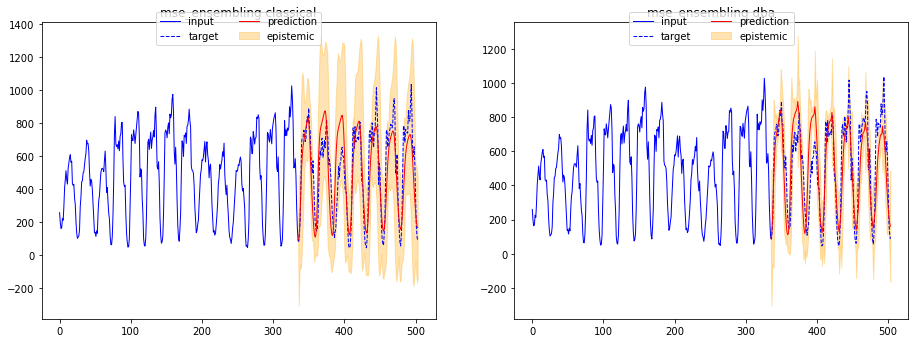

1


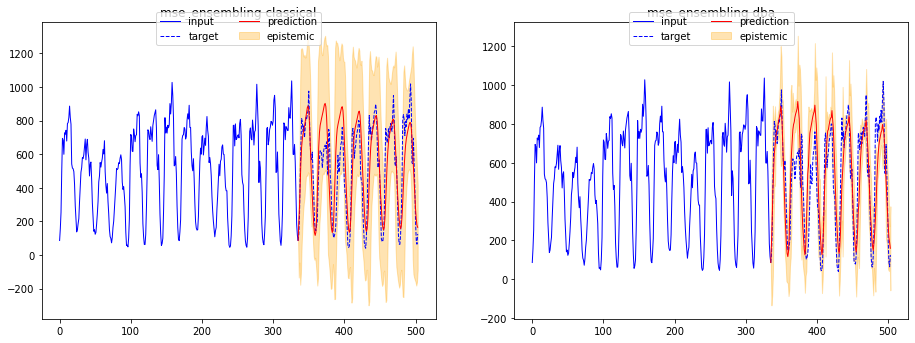

2


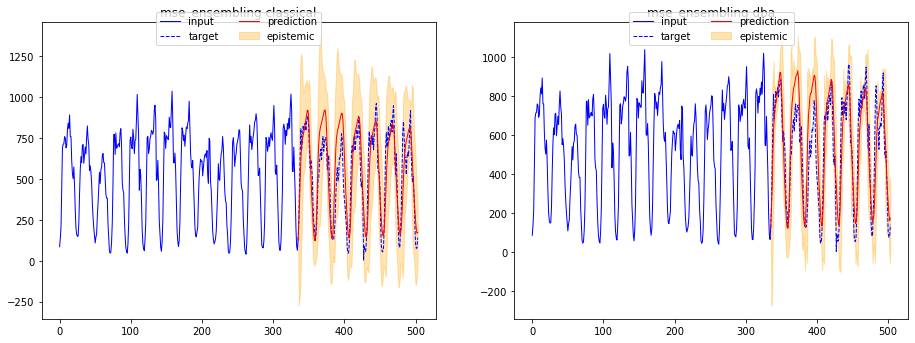

3


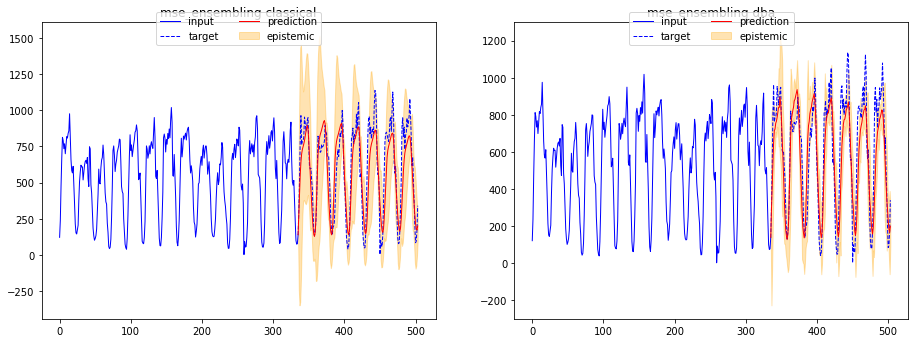

4


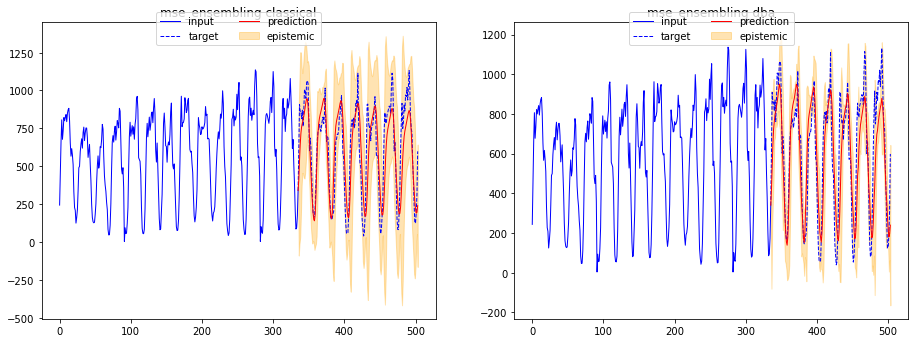

5


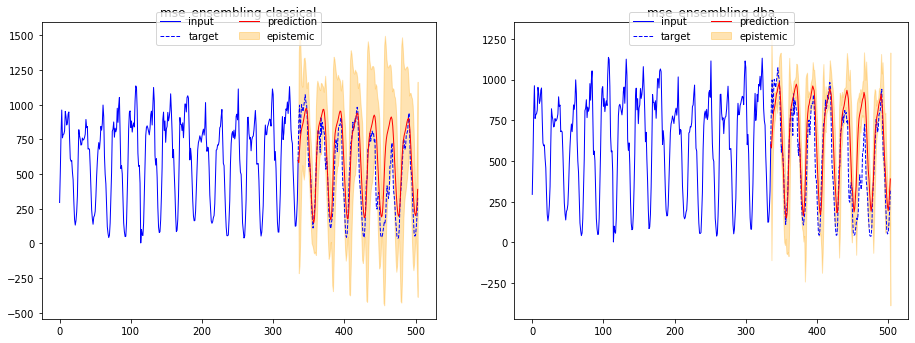

6


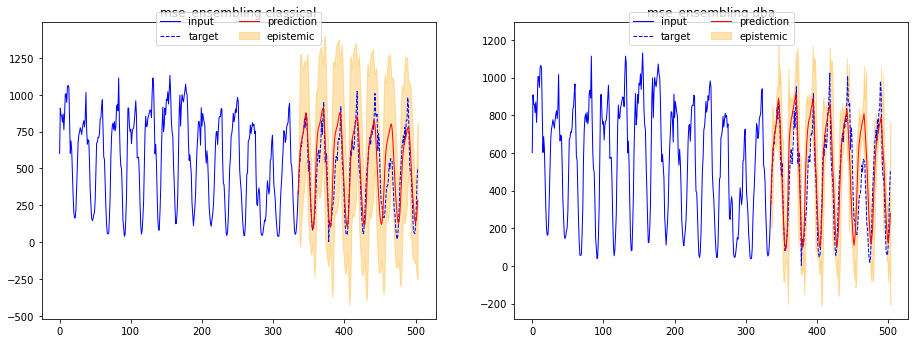

7


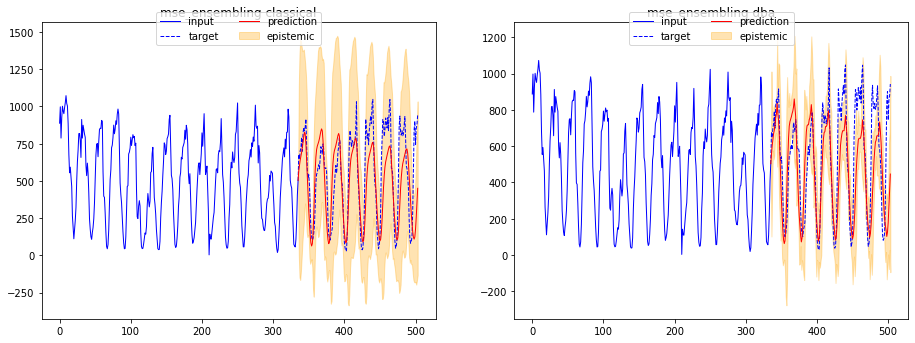

8


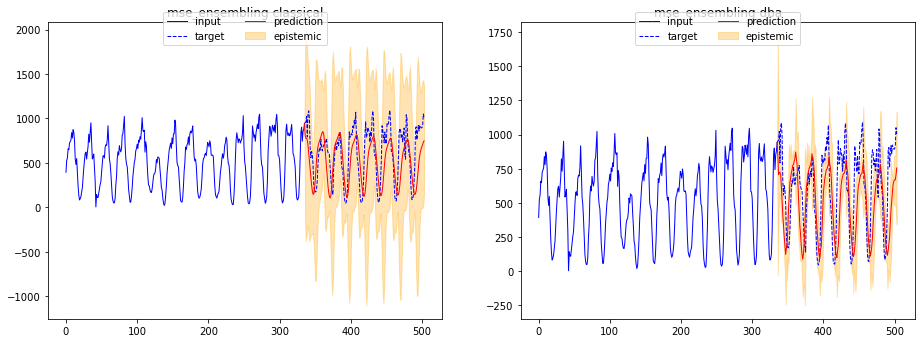

9


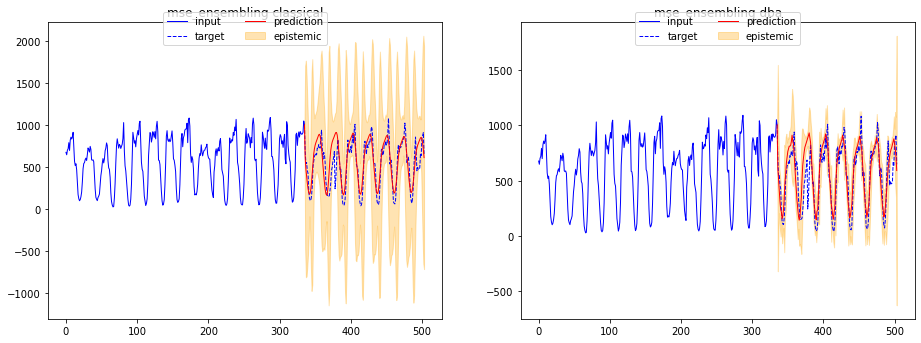

10


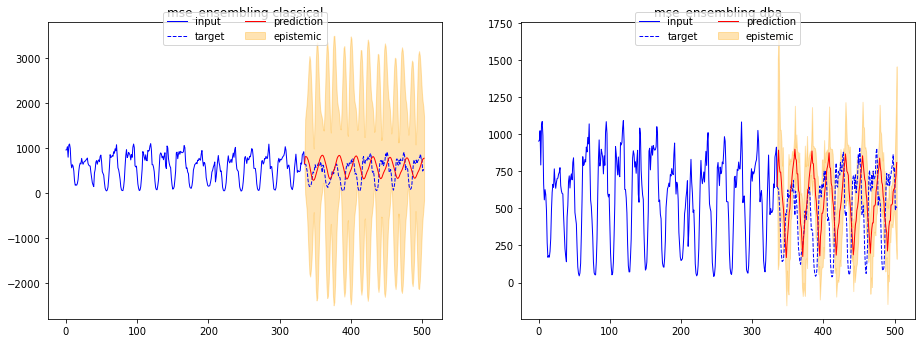

11


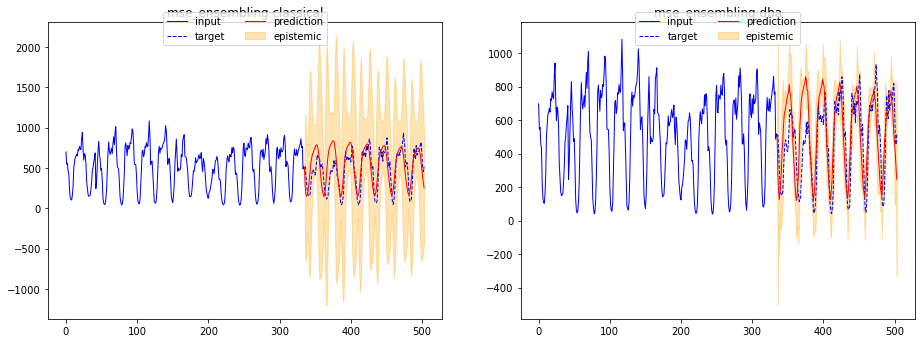

12


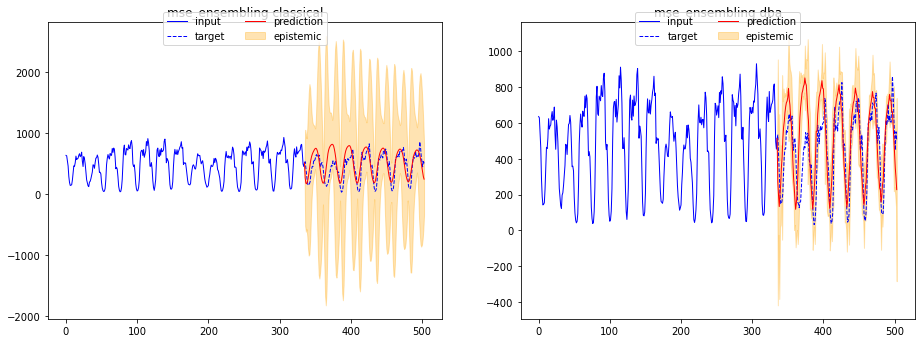

13


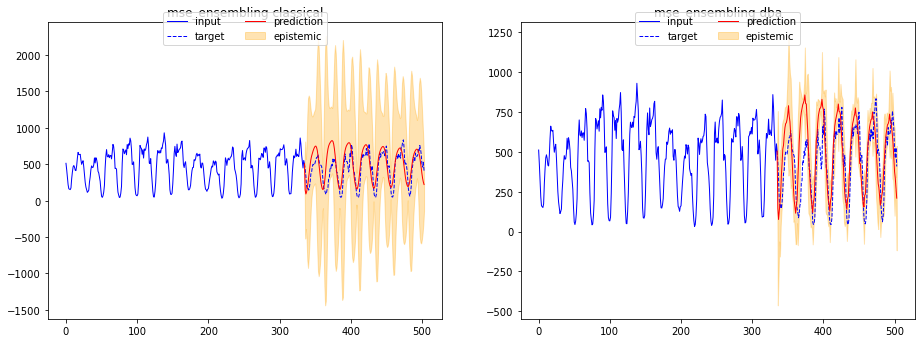

14


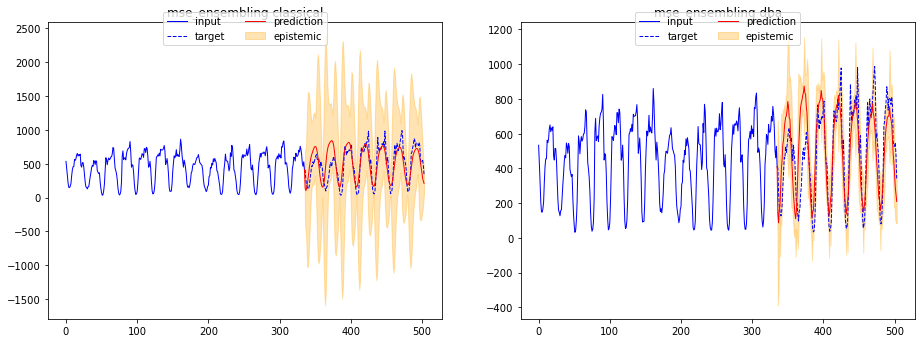

15


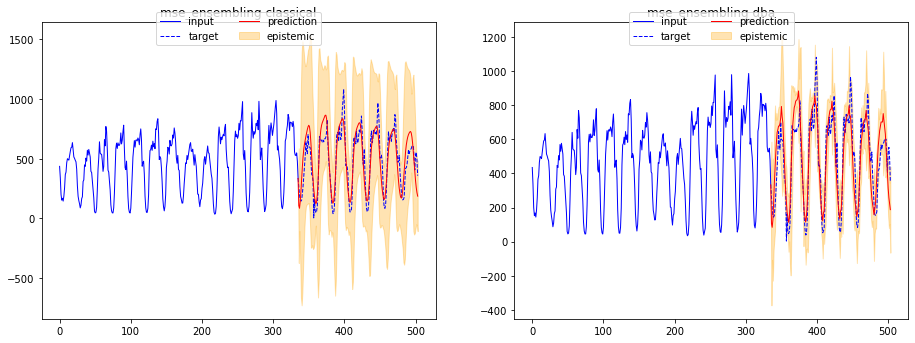

16


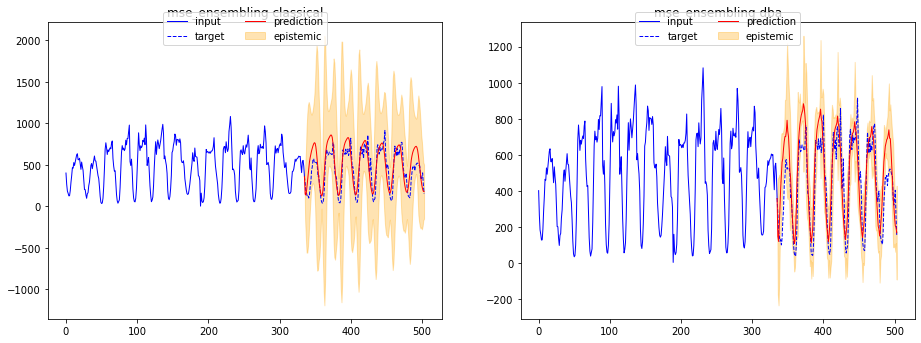

17


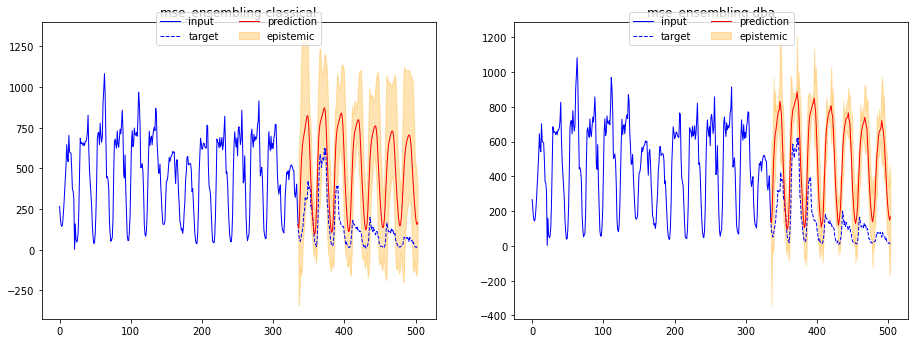

18


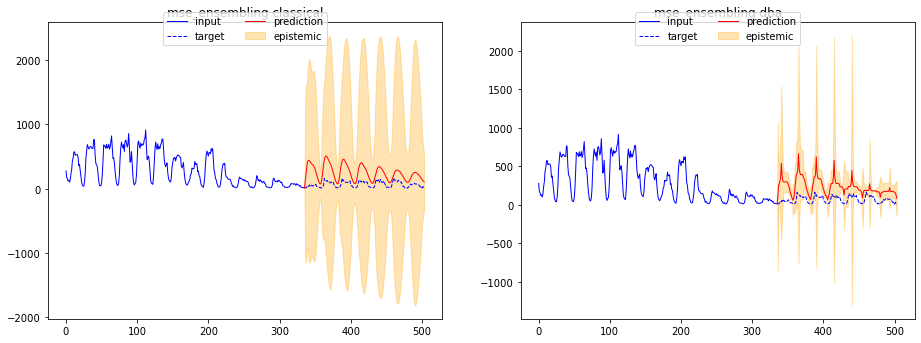

19


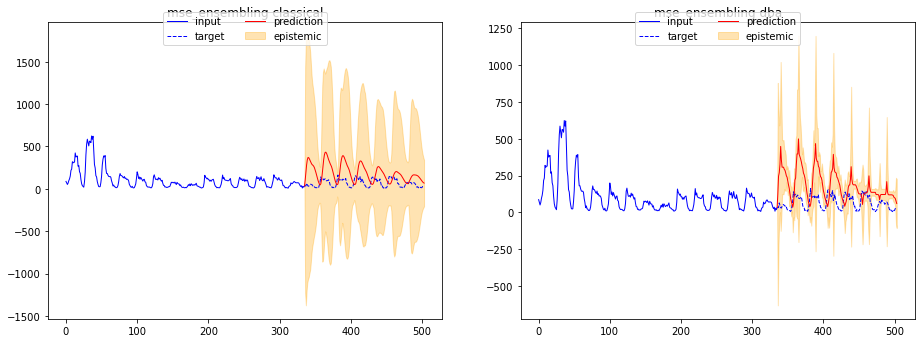

20


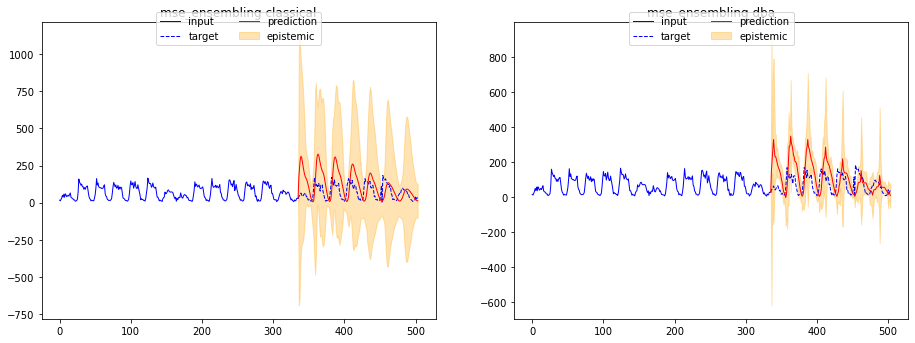

21


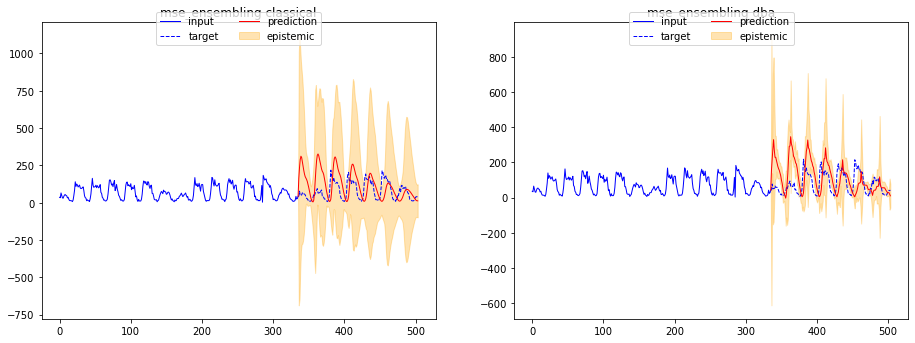

22


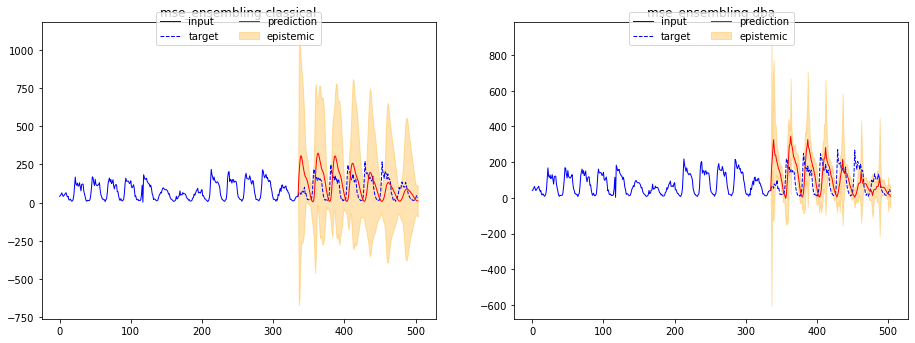

23


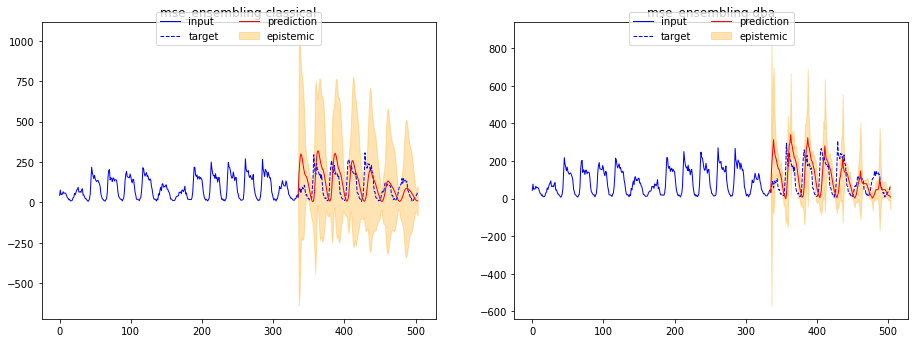

24


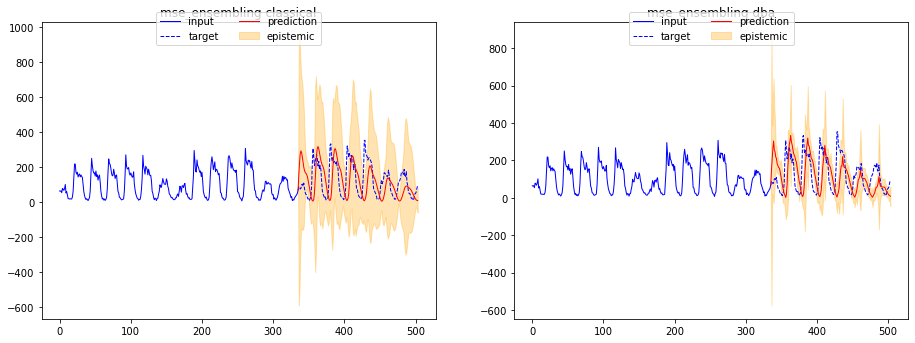

25


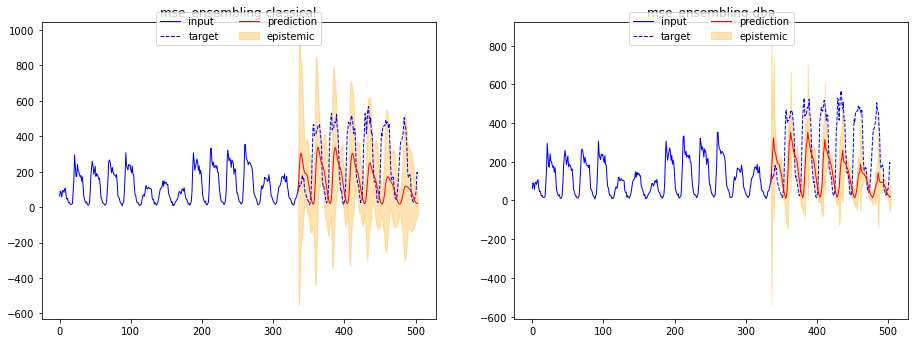

26


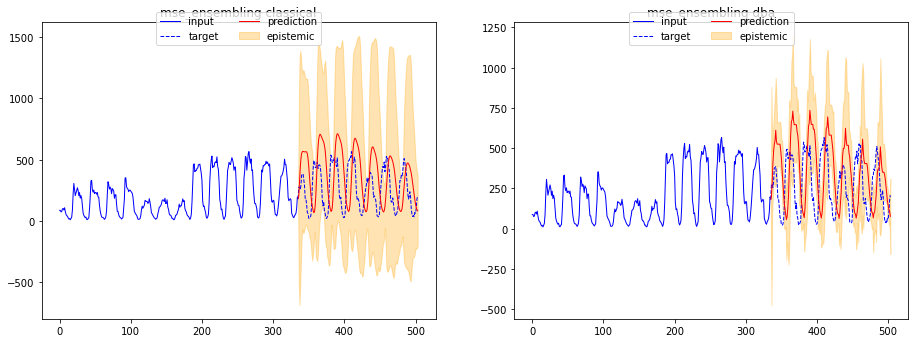

27


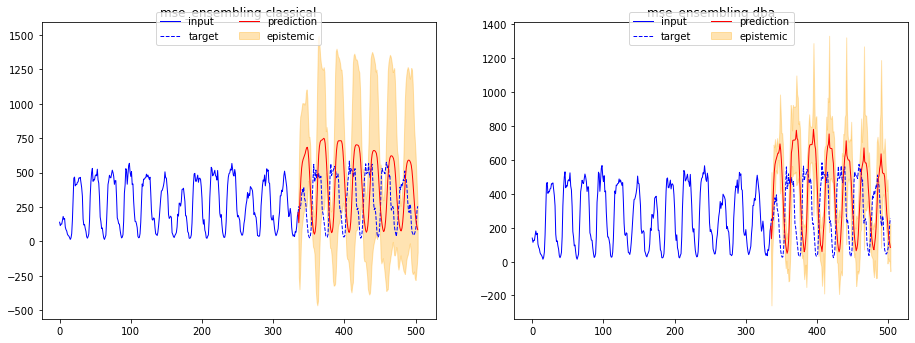

28


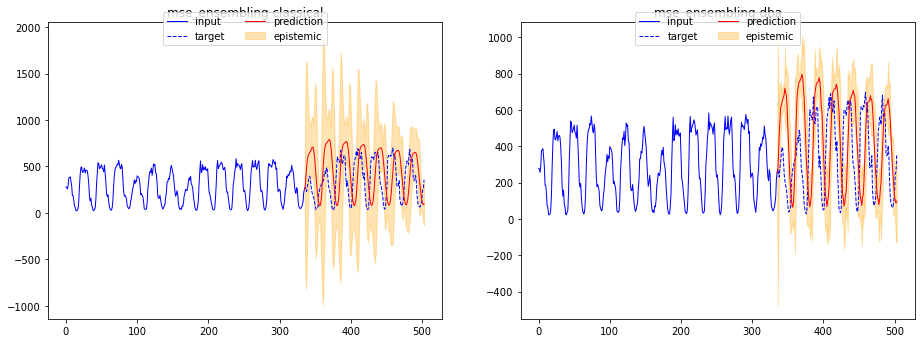

29


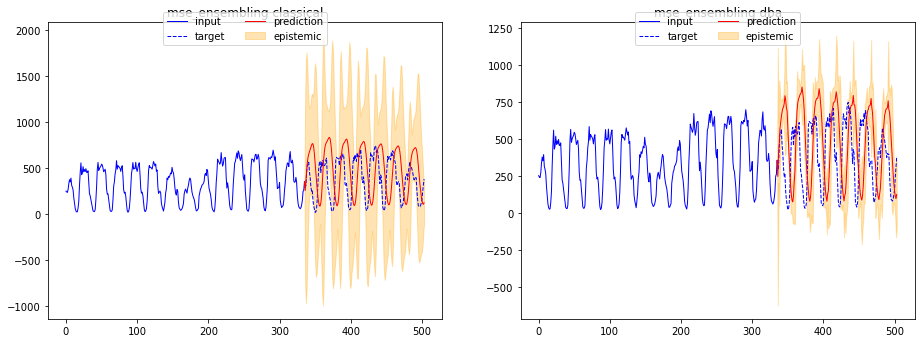

30


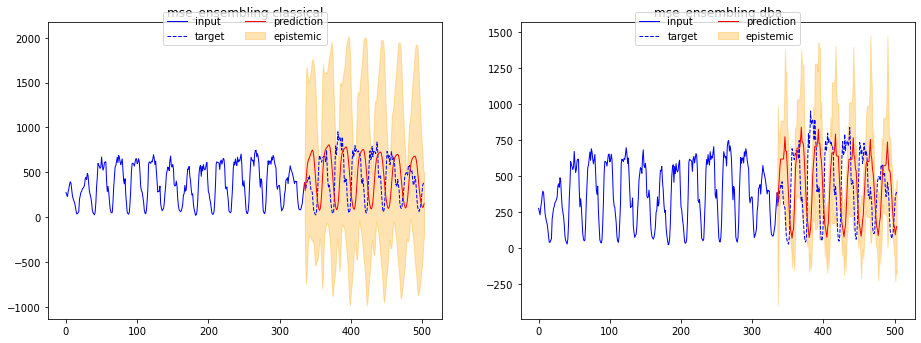

31


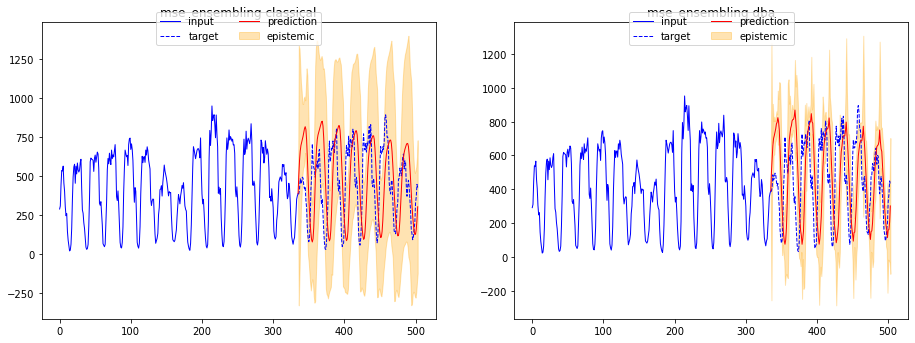

32


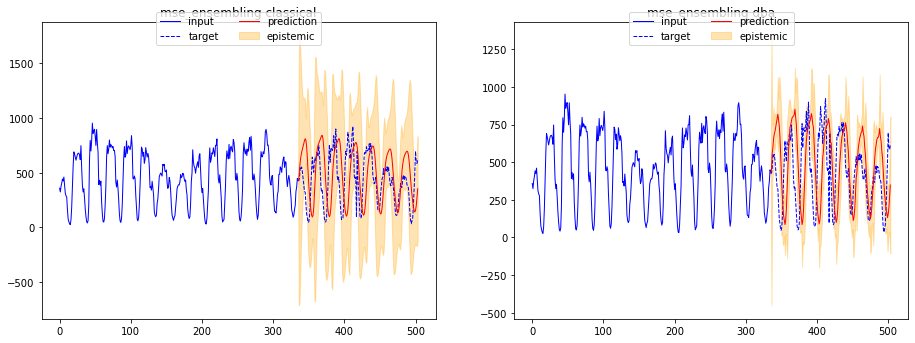

33


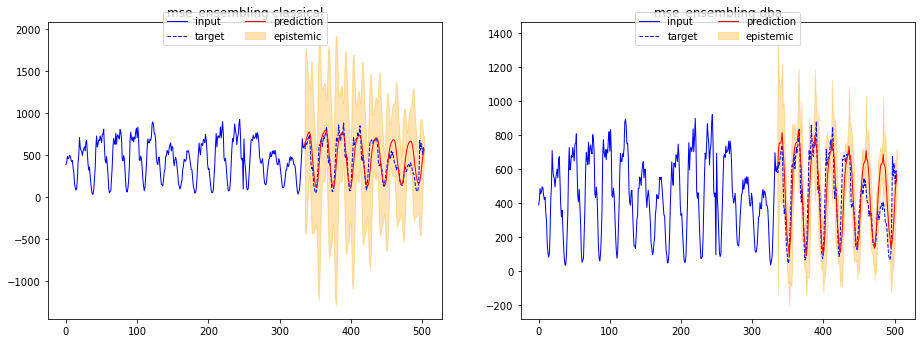

34


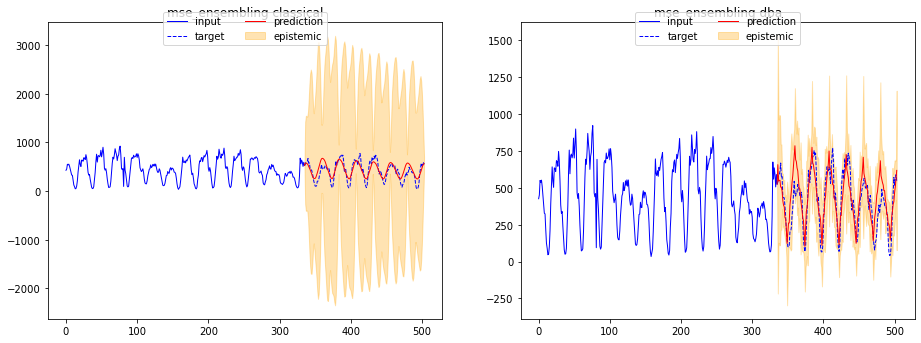

35


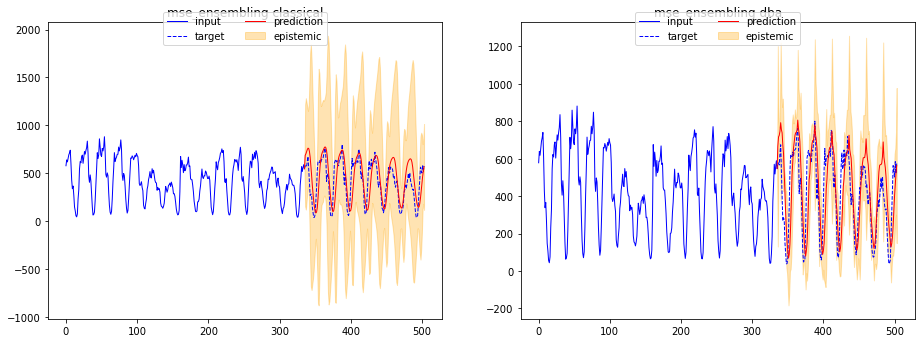

36


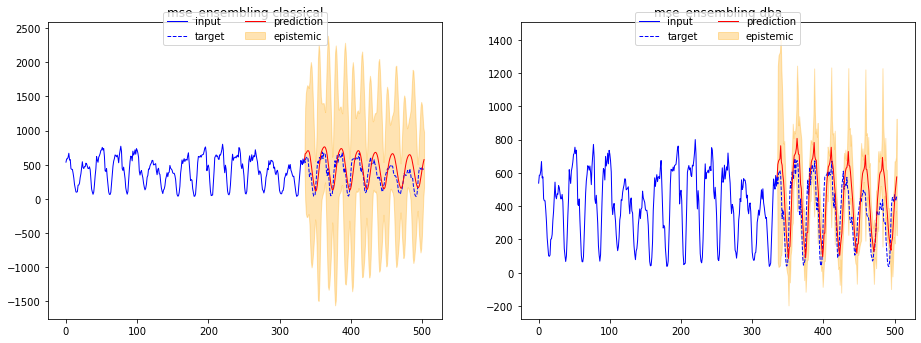

37


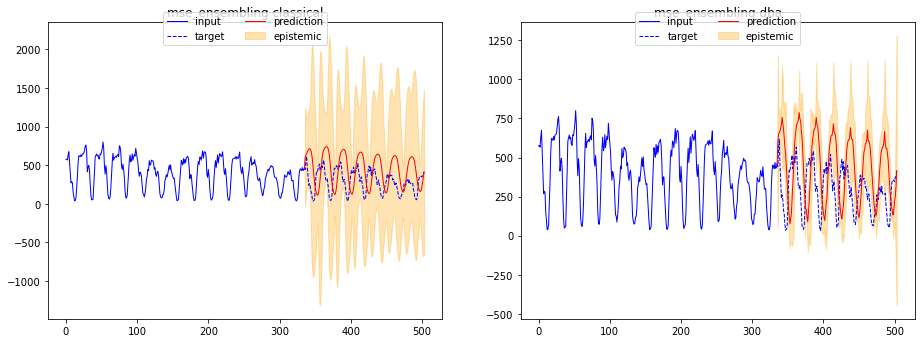

38


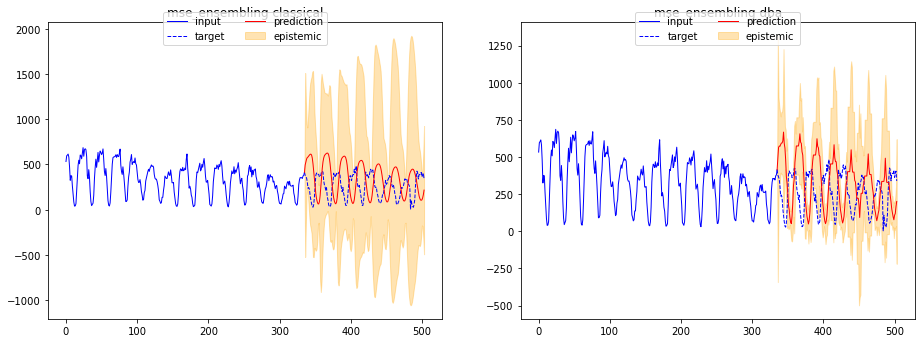

39


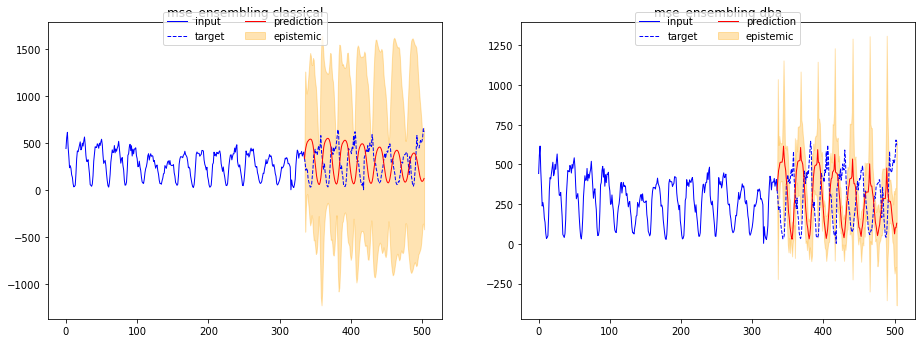

40


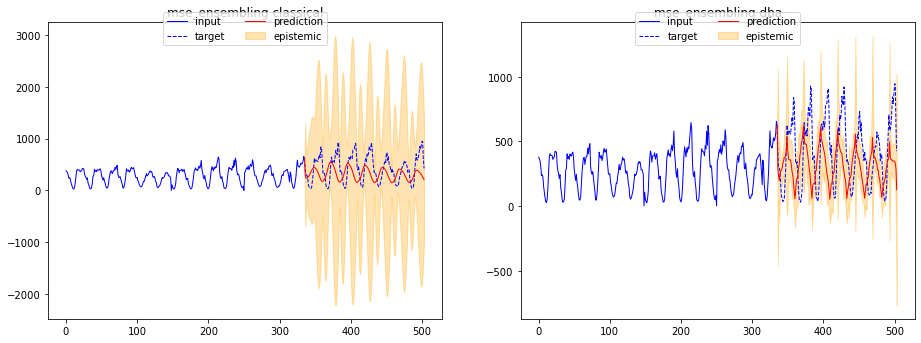

41


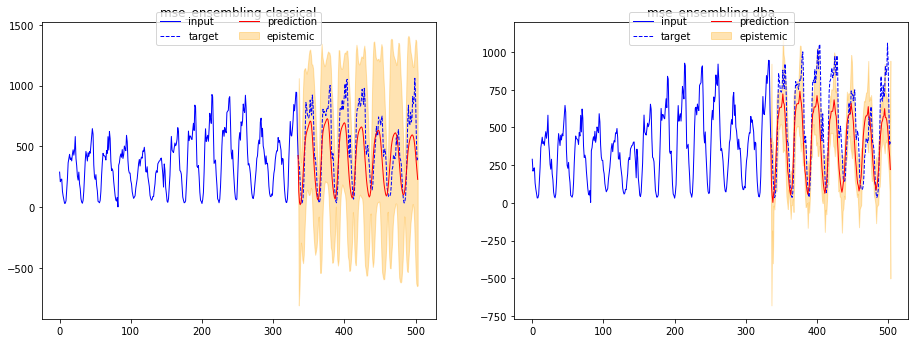

42


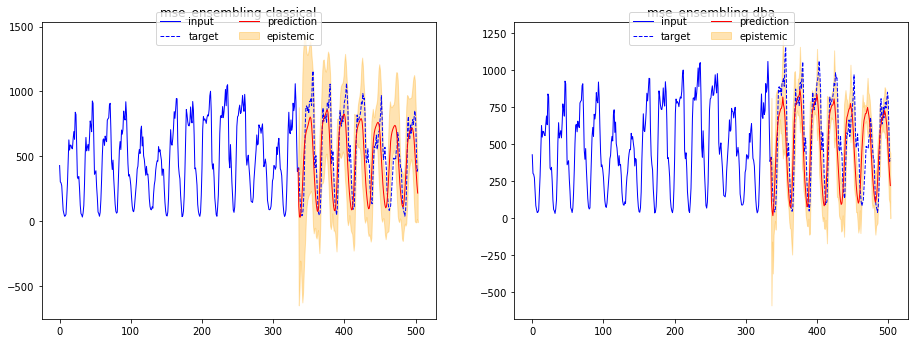

43


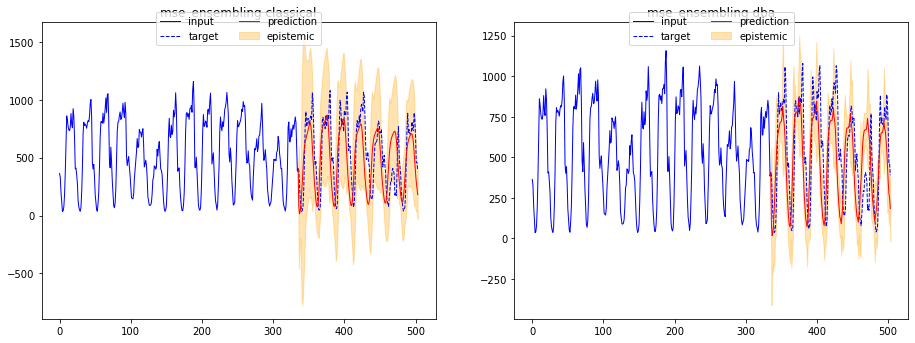

44


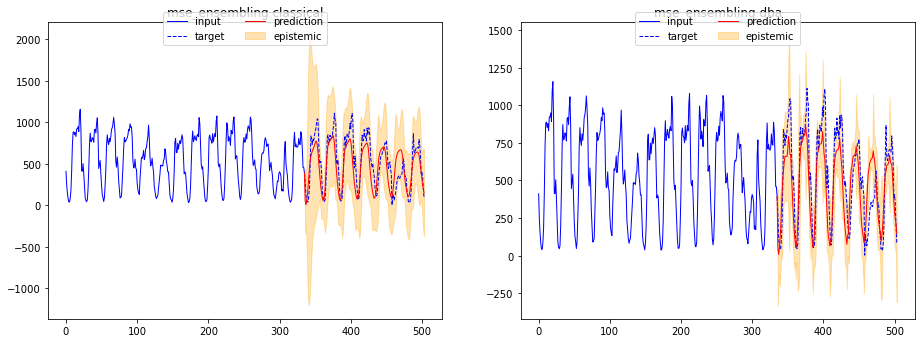

45


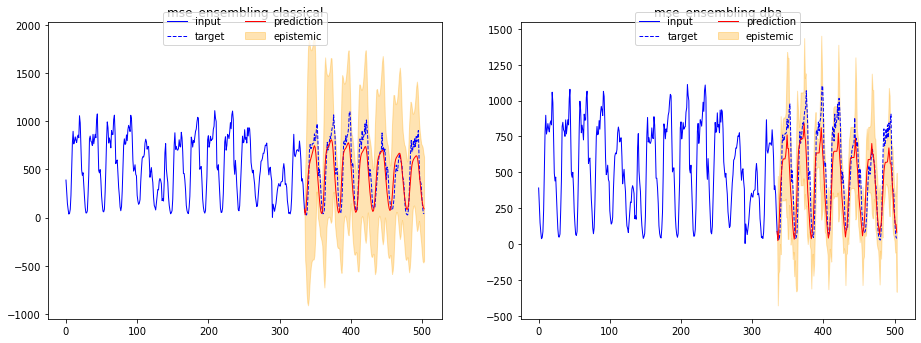

46


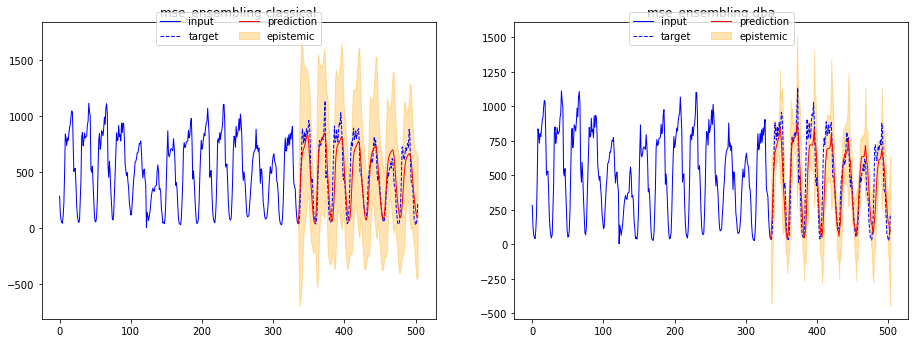

47


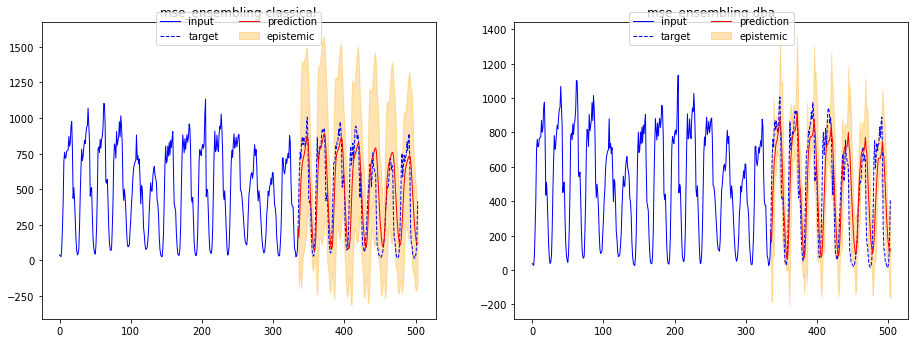

48


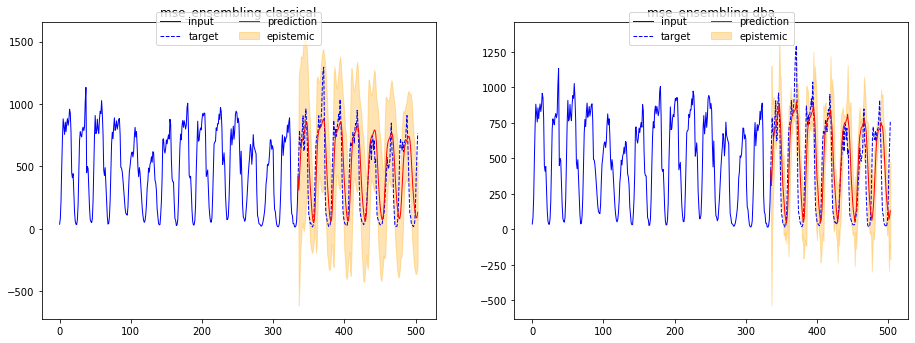

49


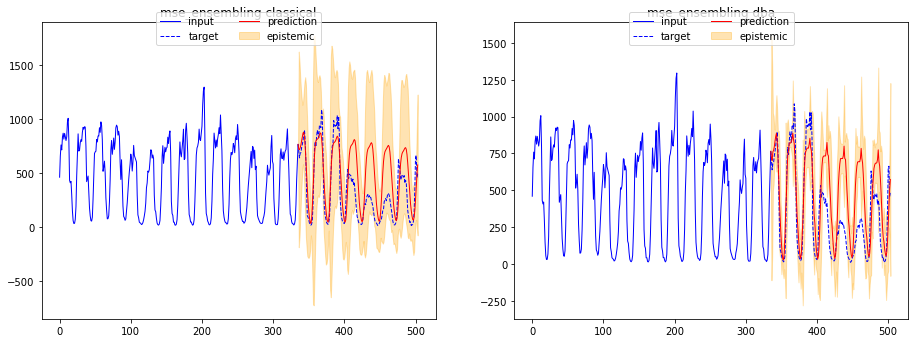

50


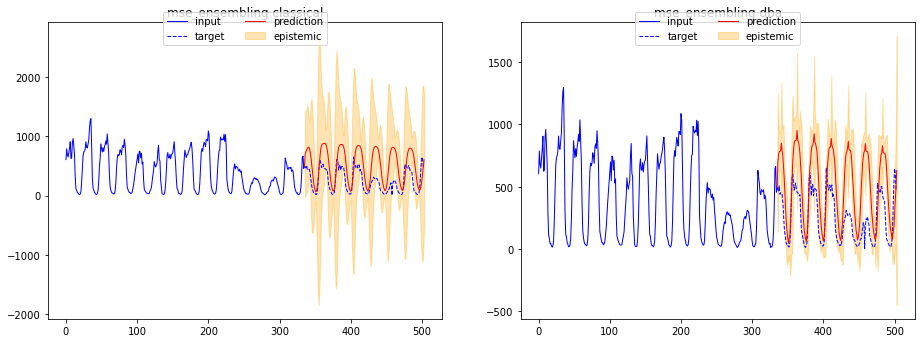

51


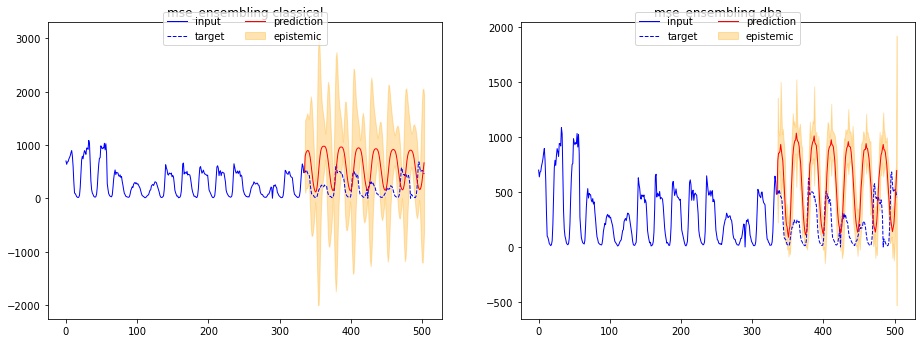

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
test_inputs = torch.FloatTensor(X_test[:,:,None]).to(device)
test_targets = torch.FloatTensor(y_test[:,:,None]).to(device)

sigmas = {n: {k: np.zeros((*test_targets.shape,)) for k in averaging_fun} for n in nets_lists}

predictions = {n: {k: np.zeros((*test_targets.shape,)) for k in averaging_fun} for n in nets_lists}

for ind in tqdm.tqdm_notebook(range(test_targets.shape[0])):
    print(ind)
    f = plt.figure(figsize=(24, 12))
    k = 1
    j = 1
    for net_name, nets_list in nets_lists.items():
        preds = []
        aleatoric_sigmas = []
        with torch.no_grad():
            for net in nets_list:
                net.eval()
                if net.mc_dropout:
                    activate_mc_dropout(net)
                pred = net(
                    test_inputs[ind:ind + 1, ...])
                if len(pred) == 2:
                    pred, _ = pred
                else:
                    pred, log_sigma, _ = pred
                    sigma = np.exp(log_sigma.cpu().numpy()[0, :, :])
                    sigma = np.squeeze(rescale(sigma))
                    aleatoric_sigmas.append(sigma)

                pred = pred.cpu().numpy()[0, :, :]
                pred = rescale(pred)
                preds.append(pred)

        preds = np.array(preds)
        aleatoric_sigmas = np.array(aleatoric_sigmas)

        aleatoric_sigmas = np.mean(aleatoric_sigmas, 0) if len(aleatoric_sigmas) != 0 else 0
        if hasattr(net, 'log_rescale_factor'):
            aleatoric_sigmas *= np.exp(net.log_rescale_factor.cpu().detach().numpy())

        for fun_name, fun in averaging_fun.items():

            pred, sigma_shape, sigma_time = fun(preds)
            
            predictions[net_name][fun_name][ind] = pred

            input = test_inputs.detach().cpu().numpy()[ind, :, :]
            input = rescale(input)
            target = test_targets.detach().cpu().numpy()[ind, :, :]
            target = rescale(target)
            
            epistemic_sigma = 0
            if sigma_shape is not None:
                epistemic_sigma += sigma_shape**2
            if sigma_time is not None:
                epistemic_sigma += sigma_time**2
            epistemic_sigma = np.sqrt(epistemic_sigma)
            
            if hasattr(net, 'log_rescale_factor'):
                epistemic_sigma *= np.exp(net.log_rescale_factor.cpu().detach().numpy())

            sigma = epistemic_sigma
            sigmas[net_name][fun_name][ind] = sigma
            
            aleatoric_sigmas = np.sqrt(aleatoric_sigmas)

            plt.subplot(len(nets_lists) + 1, len(averaging_fun) + 1, j + k)
            
            for d in [0]: #range(pred.shape[-1]):
                plt.plot(range(0, N_input), input[:, d], 'b', label='input', linewidth=1)
                plt.plot(range(N_input - 1, N_input + N_output),
                         np.concatenate([input[N_input - 1:N_input], target])[:, d],
                         'b--', label='target', linewidth=1)
                plt.plot(range(N_input - 1, N_input + N_output),
                         np.concatenate([input[N_input - 1:N_input], pred])[:, d],
                         'r', label='prediction', linewidth=1)

                plt.fill_between(
                    range(N_input - 1, N_input + N_output),
                    np.concatenate(
                        [input[N_input - 1:N_input], pred + 2 * epistemic_sigma]
                    )[:, d],
                    np.concatenate(
                        [input[N_input - 1:N_input], pred - 2 * epistemic_sigma]
                    )[:, d],
                    color='orange', alpha=0.3, label='epistemic', linewidth=1)
            
            if False:
                for d in range(pred.shape[-1]):
                    plt.fill_between(
                        range(N_input - 1, N_input + N_output),
                        np.concatenate(
                            [input[N_input - 1:N_input], pred + 2 * aleatoric_sigmas]
                        )[:, d],
                        np.concatenate(
                            [input[N_input - 1:N_input], pred - 2 * aleatoric_sigmas]
                        )[:, d],
                        color='green', alpha=0.15, label='aleatoric', linewidth=1)
            #plt.xticks(range(0, 28, 2))
            
            handles, labels = plt.gca().get_legend_handles_labels()
            by_label = dict(zip(labels, handles))
            plt.legend(by_label.values(), by_label.keys(),
                       loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

            plt.title('{} {}'.format(net_name, fun_name))
            j = j + 1
        k = k + 1

    plt.show()

In [31]:
def stat_check(value, samples, method='max'):
    if method == 'max':
        return value > (samples.mean() + 3 * samples.std())
    else:
        return value < (samples.mean() - 3 * samples.std())

def highlight(method='max'):
    def fun(data, bcolor='rgba(60,179,113,0.5)', tcolor='red'):
        '''
        highlight the maximum in a Series or DataFrame
        '''
        m = method if type(method)==str else method[data.name[1]]
        if m == 'min':
            data = -data
        attr = 'background-color: {}'.format(bcolor)

        is_max = data == data.max()

        diff_significative = stat_check(data[is_max].iloc[0], data[~is_max], method=m)
        if diff_significative:
            attr += "; color: {}".format(tcolor)

        return [attr if v else '' for v in is_max]
    return fun

def rower(data):
    s = np.arange(len(data.index)) % 2 != 0
    s = pd.concat([pd.Series(s)] * len(data.columns), axis=1) #6 or the n of cols u have
    z = pd.DataFrame(np.where(s, '', 'background-color:#f2f2f2'),
                 index=data.index, columns=data.columns)
    return z

def set_style(df):
    style = (df.style.apply(rower, axis=None)
             #.apply(highlight({'corr_indiv': 'max','corr_sum':'max','mae':'min','rmse':'min','smape':'min'}))
             .set_properties(**{'text-align': 'right', 'border': '1px solid black'})
             .set_table_styles([{'selector': 'th', 'props': {'text-align': 'right', 'border': '2px solid black'}.items()}])
            )
    return style


In [32]:
import sklearn.metrics as metrics

def filter_nans(a, b):
    cond = np.isnan(a).any(1) | (a == np.inf).any(1) | (a == -np.inf).any(1)
    return a[~cond], b[~cond]

def smape(pred, target):
    pred, target = filter_nans(pred, target)
    smape = 100 * np.mean(np.abs(target - pred) / (np.abs(pred) + np.abs(target)), (0,1))
    if smape > 100:
        smape = 100.
    return smape

def mae(pred, target):
    pred, target = filter_nans(pred, target)
    return metrics.mean_absolute_error(pred, target)


def rmse(pred, target):
    pred, target = filter_nans(pred, target)
    return np.mean(np.sqrt(np.sum((pred - target)**2, 1)), 0)

def corr_indiv(pred, target):
    pred, target = filter_nans(pred, target)
    return np.corrcoef(pred.reshape(-1), target.reshape(-1))[0, 1]

def corr_sum(pred, target):
    pred, target = filter_nans(pred, target)
    return np.corrcoef(pred.sum(1), target.sum(1))[0, 1]

In [33]:
list_metrics = {'smape': smape, 'mae': mae, 'rmse': rmse, 'corr_indiv': corr_indiv, 'corr_sum': corr_sum}

In [34]:
def compute_results(predictions, models, averaging_fun=['classical']):
    resultats =  {l: {n: {} for n in averaging_fun} for l in list_metrics}
    for i, net_name in enumerate(models):
        for fun_name in predictions[net_name]:
            for metric_name, fun in list_metrics.items(): 
                m = fun(predictions[net_name][fun_name][:,:,0],rescale(y_test)[:,:])
                resultats[metric_name][fun_name][net_name] = m
    resultats = pd.DataFrame.from_dict({(j,k): resultats[j][k]
                                        for j in resultats.keys()
                                        for k in resultats[j].keys()},
                                       orient='columns')
    print(resultats)
    resultats = resultats.stack()
    print(resultats)
    resultats.rename_axis(['Méthode', 'Aggrégation'], inplace=True)
    resultats.rename_axis(['Metric'], axis=1, inplace=True)
    return resultats

In [35]:
resultats_dl = compute_results(predictions, nets_lists, averaging_fun=averaging_fun)
set_style(resultats_dl)

                    smape                    mae                     rmse  \
                classical        dba   classical         dba    classical   
mse_ensembling  31.014238  30.867495  185.013796  184.164502  2885.456395   

                            corr_indiv            corr_sum            
                        dba  classical       dba classical       dba  
mse_ensembling  2876.500734   0.619047  0.619859   0.78885  0.787273  
                          corr_indiv  corr_sum         mae         rmse  \
mse_ensembling classical    0.619047  0.788850  185.013796  2885.456395   
               dba          0.619859  0.787273  184.164502  2876.500734   

                              smape  
mse_ensembling classical  31.014238  
               dba        30.867495  


In [37]:
print(df["Débit horaire"].mean())

542.9811300677474
